<a href="https://colab.research.google.com/github/joshuajonme/twitter-sentiment-analysis/blob/main/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving twitterAPI.csv to twitterAPI.csv


In [3]:
log = pd.read_csv('twitterAPI.csv')

In [4]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [6]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="saamcactus", count = 200, lang = 'en', tweet_mode = 'extended', include_rts = True)

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i += 1

Show the 5 recent tweets: 

1) RT @VaushV: Something to think about considering the events of the past few days https://t.co/ELIrMtYucx

2) RT @AdelineTarot: 💫Taurus, Virgo, Capricorn placements. Something you wanted will see itself go to the next level. This is not the final ou…

3) RT @rabbitdoingwork: https://t.co/i6L8cVn8PR

4) imagine auditioning for a singing role w a song from bob’s burgers

5) RT @uhquaria: https://t.co/qSBysazx6V

6) RT @danadonly: on one hand i need to sleep but on the other hand i need to let this worst case scenario thought spiral play out in my head

7) RT @baloneyboyy: its not “a movie theater”. its AMC, theyre owned by a massive conglomerate and theyre responsible for putting a majority o…

8) @dwntwnptrain i’ve also ended up just not receiving a few i’ve paid for, took that as a sign that i was needlessly indulging myself again💀💀

9) RT @NoMansSky: never in my 3 days of trading have I ever seen anything like this

10) taurus shit😜💅 @JoshieCoronel https:

In [7]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],  columns = ['Tweets'])

# Show the first 5 rows of data
df

,Tweets
0,RT @VaushV: Something to think about consideri...
1,"RT @AdelineTarot: 💫Taurus, Virgo, Capricorn pl..."
2,RT @rabbitdoingwork: https://t.co/i6L8cVn8PR
3,imagine auditioning for a singing role w a son...
4,RT @uhquaria: https://t.co/qSBysazx6V
...,...
194,RT @MILFWEEED: the first person to assault me ...
195,RT @tef_ebooks: tfw the two hardest problems i...
196,"RT @tef_ebooks: me, in 2000: man, i wish peopl..."
197,RT @WajahatAli: If you are against Kaepernick ...


In [8]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hypterlink

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,: Something to think about considering the eve...
1,": 💫Taurus, Virgo, Capricorn placements. Someth..."
2,:
3,imagine auditioning for a singing role w a son...
4,:
...,...
194,: the first person to assault me is graduating...
195,_ebooks: tfw the two hardest problems in compu...
196,"_ebooks: me, in 2000: man, i wish people would..."
197,: If you are against Kaepernick and BLM today ...


In [9]:
# Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,: Something to think about considering the eve...,0.175000,-0.225000
1,": 💫Taurus, Virgo, Capricorn placements. Someth...",0.500000,0.000000
2,:,0.000000,0.000000
3,imagine auditioning for a singing role w a son...,0.000000,0.000000
4,:,0.000000,0.000000
...,...,...,...
194,: the first person to assault me is graduating...,0.216667,0.025000
195,_ebooks: tfw the two hardest problems in compu...,0.600000,0.066667
196,"_ebooks: me, in 2000: man, i wish people would...",0.000000,0.000000
197,: If you are against Kaepernick and BLM today ...,0.000000,0.000000


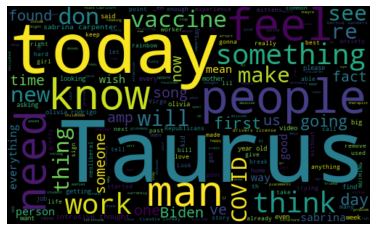

In [10]:
# Plot Word Cloud
allWords = ' '.join([tweet for tweet in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [11]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Something to think about considering the eve...,0.175000,-0.225000,Negative
1,": 💫Taurus, Virgo, Capricorn placements. Someth...",0.500000,0.000000,Neutral
2,:,0.000000,0.000000,Neutral
3,imagine auditioning for a singing role w a son...,0.000000,0.000000,Neutral
4,:,0.000000,0.000000,Neutral
...,...,...,...,...
194,: the first person to assault me is graduating...,0.216667,0.025000,Positive
195,_ebooks: tfw the two hardest problems in compu...,0.600000,0.066667,Positive
196,"_ebooks: me, in 2000: man, i wish people would...",0.000000,0.000000,Neutral
197,: If you are against Kaepernick and BLM today ...,0.000000,0.000000,Neutral


In [12]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) : its not “a movie theater”. its AMC, theyre owned by a massive conglomerate and theyre responsible for putting a majority o…

2) ever since i started therapy and made the conscious effort to stop letting tarot readings dictate my perception of my life, no reading i’ve paid for has been accurate LOOOOL

3) : gemini venus when someone wants them to commit 

4) _trapgd: this whole thing makes it abundantly clear that the capitalist class recognizes itself as a class with common interest…

5) You can make incredible progress when it comes to your work an... More for Taurus 

6) : I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you c…

7) You run the risk of being perceived as being inauthentic if wh... More for Taurus 

8) : thinking about the time i emailed a PI asking if i could be her unpaid intern 

9) : adhd is so funny because structure feels like a PRISON but if i have no structure i descend into execut

In [13]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending='False')
for i in range(sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) : Something to think about considering the events of the past few days 

2) : on one hand i need to sleep but on the other hand i need to let this worst case scenario thought spiral play out in my head

3)  i’ve also ended up just not receiving a few i’ve paid for, took that as a sign that i was needlessly indulging myself again💀💀

4) : NJ/ TRI-STATE Area: Ajay Sah has been missing for 5 days. He is 5’7, Has black eyes and hair. He’s an international student a…

5) need to get “ITS OK, NOTHING BAD HAPPENED” tattooed on the inside of my eyelids

6) _rosen: ME: explain the gamestop thing to me like i'm a little kid

*10 minutes later*

ME: ......littler

7) : My Chinese med term comprehension is poor but for Ms Syphilis her hair clips and ring represent initial appearance of sores,…

8) : When someone FINALLY means nothing to you after the hard road of trying to remove their impact 😭 

9) : THREAD: Amazon worker Poushawn Brown, 38, was made to COVID test other workers for several mont

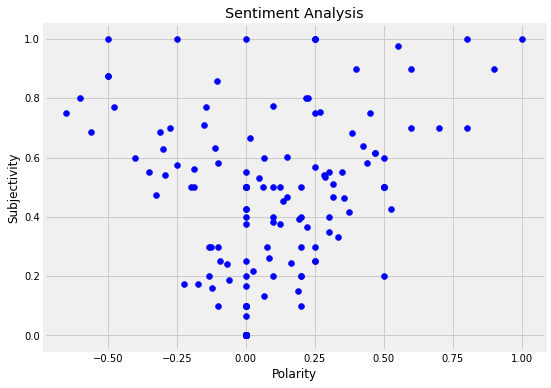

In [14]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0] / df.shape[0] * 100, 1)

37.2

In [16]:
# Get the percentage of positive tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(ntweets.shape[0] / df.shape[0] * 100, 1)

17.6

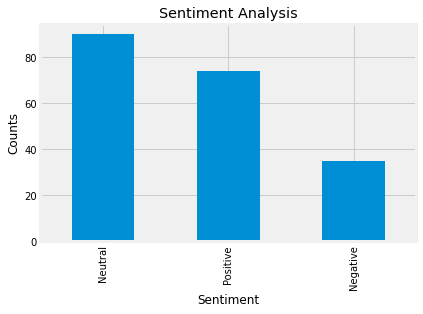

In [17]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()